## Policy attention - Legislative bills
### MACS 30200 - Perspectives on Computational Research 

Ellen Hsieh

May 13, 2019

In [2]:
import pandas as pd
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### 1. Import the data and tokenize to use with Keras.

In [3]:
congress_train_df = pd.read_csv('data/congress_train.csv', encoding='latin-1')
congress_val_df = pd.read_csv('data/congress_val.csv', encoding='latin-1')
congress_test_df = pd.read_csv('data/congress_test.csv', encoding='latin-1')

congress_train_text = list(congress_train_df['Title'])
congress_val_text = list(congress_val_df['Title'])
congress_test_text = list(congress_test_df['Title'])

y_train = to_categorical(congress_train_df['Major'])
y_valid = to_categorical(congress_val_df['Major'])
y_test = to_categorical(congress_test_df['Major'])

In [4]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(congress_train_text)

seq_train = tokenizer.texts_to_sequences(congress_train_text)
seq_test = tokenizer.texts_to_sequences(congress_test_text)
seq_valid = tokenizer.texts_to_sequences(congress_val_text)

x_train = pad_sequences(seq_train, maxlen=100)
x_test = pad_sequences(seq_test, maxlen=100)
x_valid = pad_sequences(seq_valid, maxlen=100)

#### 2. Use a task-specific embedding layer with an appropriate number of output dimensions 
#### 3. Estimate a basic feed-forward network

In [5]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

model_ff = Sequential()
model_ff.add(Embedding(10000, 32, input_length=100))
model_ff.add(Flatten())
model_ff.add(Dense(24, activation='softmax'))
model_ff.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_ff = model_ff.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=512)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 9s 34us/step - loss: 1.7592 - acc: 0.5220 - val_loss: 0.9844 - val_acc: 0.7401
Epoch 2/50
278612/278612 [==============================] - 10s 36us/step - loss: 0.7880 - acc: 0.7915 - val_loss: 0.7061 - val_acc: 0.8135
Epoch 3/50
278612/278612 [==============================] - 10s 34us/step - loss: 0.6279 - acc: 0.8298 - val_loss: 0.6383 - val_acc: 0.8292
Epoch 4/50
278612/278612 [==============================] - 11s 38us/step - loss: 0.5612 - acc: 0.8466 - val_loss: 0.6119 - val_acc: 0.8327
Epoch 5/50
278612/278612 [==============================] - 10s 36us/step - loss: 0.5187 - acc: 0.8575 - val_loss: 0.5889 - val_acc: 0.8422
Epoch 6/50
278612/278612 [==============================] - 10s 37us/step - loss: 0.4875 - acc: 0.8653 - val_loss: 0.5803 - val_ac

#### 4. Estimate a recurrent neural network (RNN) with a layer_simple_rnn

In [6]:
from keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Embedding(10000, 32, input_length=100))
model_rnn.add(SimpleRNN(30))
model_rnn.add(Dense(24, activation='softmax'))
model_rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn = model_rnn.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=50, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 37s 132us/step - loss: 2.1374 - acc: 0.3704 - val_loss: 1.6980 - val_acc: 0.5028
Epoch 2/50
278612/278612 [==============================] - 37s 132us/step - loss: 1.4080 - acc: 0.6112 - val_loss: 1.3258 - val_acc: 0.6400
Epoch 3/50
278612/278612 [==============================] - 36s 129us/step - loss: 1.0956 - acc: 0.7132 - val_loss: 1.0820 - val_acc: 0.7179
Epoch 4/50
278612/278612 [==============================] - 37s 133us/step - loss: 0.9592 - acc: 0.7527 - val_loss: 1.0224 - val_acc: 0.7347
Epoch 5/50
278612/278612 [==============================] - 35s 124us/step - loss: 0.8824 - acc: 0.7737 - val_loss: 0.9614 - val_acc: 0.7544
Epoch 6/50
278612/278612 [==============================] - 36s 127us/step - loss: 0.8250 - acc: 0.7889 - val_loss: 0.9428 - val_acc: 0.7607
Epoch 7/50
278612/278612 [==============================] - 31s 110us/step - loss: 0.7741 - acc: 0.8025

#### 5. Estimate an RNN with an LSTM layer

In [7]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(10000, 32, input_length=100))
model_lstm.add(LSTM(30))
model_lstm.add(Dense(24, activation='softmax'))
model_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 118s 422us/step - loss: 2.0668 - acc: 0.4178 - val_loss: 1.4889 - val_acc: 0.5915
Epoch 2/25
278612/278612 [==============================] - 120s 430us/step - loss: 1.2071 - acc: 0.6852 - val_loss: 1.0468 - val_acc: 0.7342
Epoch 3/25
278612/278612 [==============================] - 112s 402us/step - loss: 0.8669 - acc: 0.7843 - val_loss: 0.7919 - val_acc: 0.8012
Epoch 4/25
278612/278612 [==============================] - 115s 413us/step - loss: 0.7043 - acc: 0.8199 - val_loss: 0.7154 - val_acc: 0.8133
Epoch 5/25
278612/278612 [==============================] - 107s 383us/step - loss: 0.6205 - acc: 0.8371 - val_loss: 0.6489 - val_acc: 0.8269
Epoch 6/25
278612/278612 [==============================] - 124s 444us/step - loss: 0.5704 - acc: 0.8468 - val_loss: 0.6482 - val_acc: 0.8246
Epoch 7/25
278612/278612 [==============================] - 116s 418us/step - loss: 0.5364 - acc:

#### 6. Estimate an RNN with a GRU layer

In [8]:
from keras.layers import GRU

model_gru = Sequential()
model_gru.add(Embedding(10000, 32, input_length=100))
model_gru.add(GRU(30))
model_gru.add(Dense(24, activation='softmax'))
model_gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru = model_gru.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 87s 314us/step - loss: 2.3678 - acc: 0.2725 - val_loss: 1.8248 - val_acc: 0.4716
Epoch 2/25
278612/278612 [==============================] - 79s 283us/step - loss: 1.4798 - acc: 0.5850 - val_loss: 1.2416 - val_acc: 0.6704
Epoch 3/25
278612/278612 [==============================] - 77s 278us/step - loss: 1.0117 - acc: 0.7456 - val_loss: 0.9095 - val_acc: 0.7759
Epoch 4/25
278612/278612 [==============================] - 79s 282us/step - loss: 0.7992 - acc: 0.7992 - val_loss: 0.7886 - val_acc: 0.7998
Epoch 5/25
278612/278612 [==============================] - 78s 280us/step - loss: 0.6875 - acc: 0.8227 - val_loss: 0.6942 - val_acc: 0.8197
Epoch 6/25
278612/278612 [==============================] - 79s 283us/step - loss: 0.6187 - acc: 0.8370 - val_loss: 0.6454 - val_acc: 0.8301
Epoch 7/25
278612/278612 [==============================] - 79s 282us/step - loss: 0.5738 - acc: 0.8459

#### 7. Estimate five additional neural network models with different configurations of hyperparameters

In [9]:
# 2-layers RNN with layer simple
model_rnn_2 = Sequential()
model_rnn_2.add(Embedding(10000, 32, input_length=100))
model_rnn_2.add(SimpleRNN(30, return_sequences=True))
model_rnn_2.add(SimpleRNN(30))
model_rnn_2.add(Dense(24, activation='softmax'))
model_rnn_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_2 = model_rnn_2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 61s 220us/step - loss: 1.9996 - acc: 0.4192 - val_loss: 1.5025 - val_acc: 0.5902
Epoch 2/25
278612/278612 [==============================] - 60s 217us/step - loss: 1.2473 - acc: 0.6645 - val_loss: 1.2100 - val_acc: 0.6666
Epoch 3/25
278612/278612 [==============================] - 61s 220us/step - loss: 0.9922 - acc: 0.7405 - val_loss: 1.0082 - val_acc: 0.7348
Epoch 4/25
278612/278612 [==============================] - 71s 255us/step - loss: 0.8787 - acc: 0.7716 - val_loss: 1.1413 - val_acc: 0.6856
Epoch 5/25
278612/278612 [==============================] - 63s 226us/step - loss: 0.8074 - acc: 0.7894 - val_loss: 3.4875 - val_acc: 0.2231
Epoch 6/25
278612/278612 [==============================] - 71s 255us/step - loss: 0.7550 - acc: 0.8035 - val_loss: 0.9485 - val_acc: 0.7560
Epoch 7/25
278612/278612 [==============================] - 60s 217us/step - loss: 0.7164 - acc: 0.8133

In [10]:
# simple RNN regularized by l1
from keras import regularizers

model_rnn_l1 = Sequential()
model_rnn_l1.add(Embedding(10000, 32, input_length=100))
model_rnn_l1.add(SimpleRNN(30, kernel_regularizer=regularizers.l1(0.01)))
model_rnn_l1.add(Dense(24, activation='softmax'))
model_rnn_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_l1 = model_rnn_l1.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 36s 128us/step - loss: 3.0432 - acc: 0.1993 - val_loss: 2.4710 - val_acc: 0.2655
Epoch 2/25
278612/278612 [==============================] - 37s 133us/step - loss: 2.4070 - acc: 0.2919 - val_loss: 2.3602 - val_acc: 0.3222
Epoch 3/25
278612/278612 [==============================] - 36s 128us/step - loss: 2.1190 - acc: 0.4036 - val_loss: 1.9715 - val_acc: 0.4494
Epoch 4/25
278612/278612 [==============================] - 34s 122us/step - loss: 1.8473 - acc: 0.4991 - val_loss: 1.8102 - val_acc: 0.5049
Epoch 5/25
278612/278612 [==============================] - 33s 120us/step - loss: 1.7004 - acc: 0.5469 - val_loss: 1.9101 - val_acc: 0.4893
Epoch 6/25
278612/278612 [==============================] - 33s 119us/step - loss: 1.5697 - acc: 0.5912 - val_loss: 1.7117 - val_acc: 0.5340
Epoch 7/25
278612/278612 [==============================] - 36s 130us/step - loss: 1.4046 - acc: 0.6446

In [11]:
# simple RNN with drop rate = 0.5
model_rnn_drop = Sequential()
model_rnn_drop.add(Embedding(10000, 32, input_length=100))
model_rnn_drop.add(SimpleRNN(30, dropout=0.5))
model_rnn_drop.add(Dense(24, activation='softmax'))
model_rnn_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_rnn_drop = model_rnn_drop.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 34s 122us/step - loss: 2.3827 - acc: 0.2937 - val_loss: 1.7763 - val_acc: 0.4925
Epoch 2/25
278612/278612 [==============================] - 33s 119us/step - loss: 1.6061 - acc: 0.5431 - val_loss: 1.2965 - val_acc: 0.6546
Epoch 3/25
278612/278612 [==============================] - 33s 119us/step - loss: 1.3171 - acc: 0.6378 - val_loss: 1.5318 - val_acc: 0.5851
Epoch 4/25
278612/278612 [==============================] - 33s 120us/step - loss: 1.2073 - acc: 0.6731 - val_loss: 1.0799 - val_acc: 0.7160
Epoch 5/25
278612/278612 [==============================] - 33s 120us/step - loss: 1.1405 - acc: 0.6930 - val_loss: 1.0349 - val_acc: 0.7331
Epoch 6/25
278612/278612 [==============================] - 33s 120us/step - loss: 1.0985 - acc: 0.7071 - val_loss: 1.0823 - val_

In [13]:
# LSTM RNN with dropout rate = 0.5
model_lstm_drop = Sequential()
model_lstm_drop.add(Embedding(10000, 32, input_length=100))
model_lstm_drop.add(LSTM(30, dropout=0.5))
model_lstm_drop.add(Dense(24, activation='softmax'))
model_lstm_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_lstm_drop = model_lstm_drop.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 107s 383us/step - loss: 2.1317 - acc: 0.3777 - val_loss: 1.4485 - val_acc: 0.6010
Epoch 2/25
278612/278612 [==============================] - 111s 400us/step - loss: 1.2694 - acc: 0.6529 - val_loss: 0.9799 - val_acc: 0.7524
Epoch 3/25
278612/278612 [==============================] - 112s 403us/step - loss: 0.9672 - acc: 0.7503 - val_loss: 0.8365 - val_acc: 0.7893
Epoch 4/25
278612/278612 [==============================] - 110s 393us/step - loss: 0.8391 - acc: 0.7838 - val_loss: 0.7516 - val_acc: 0.8101
Epoch 5/25
278612/278612 [==============================] - 104s 374us/step - loss: 0.7643 - acc: 0.8025 - val_loss: 0.7279 - val_acc: 0.8142
Epoch 6/25
278612/278612 [==============================] - 105s 378us/step - loss: 0.7181 - acc: 0.8127 - val_loss: 0.7086 - val_acc: 0.8189
Epoch 7/25
278612/278612 [==============================] - 104s 375us/step - loss: 0.6830 - acc:

In [14]:
# GRU RNN with dropout rate = 0.5
model_gru_drop = Sequential()
model_gru_drop.add(Embedding(10000, 32, input_length=100))
model_gru_drop.add(GRU(30, dropout=0.5))
model_gru_drop.add(Dense(24, activation='softmax'))
model_gru_drop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_gru_drop = model_gru_drop.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=25, batch_size=512)

Train on 278612 samples, validate on 69649 samples
Epoch 1/25
278612/278612 [==============================] - 87s 312us/step - loss: 2.4549 - acc: 0.2455 - val_loss: 1.8889 - val_acc: 0.4495
Epoch 2/25
278612/278612 [==============================] - 101s 364us/step - loss: 1.6449 - acc: 0.5298 - val_loss: 1.3006 - val_acc: 0.6580
Epoch 3/25
278612/278612 [==============================] - 120s 429us/step - loss: 1.2178 - acc: 0.6744 - val_loss: 1.1524 - val_acc: 0.6979
Epoch 4/25
278612/278612 [==============================] - 90s 322us/step - loss: 1.0108 - acc: 0.7415 - val_loss: 0.8676 - val_acc: 0.7840
Epoch 5/25
278612/278612 [==============================] - 83s 299us/step - loss: 0.8987 - acc: 0.7697 - val_loss: 0.8222 - val_acc: 0.7936
Epoch 6/25
278612/278612 [==============================] - 83s 299us/step - loss: 0.8238 - acc: 0.7873 - val_loss: 0.7372 - val_acc: 0.8111
Epoch 7/25
278612/278612 [==============================] - 86s 309us/step - loss: 0.7679 - acc: 0.79

#### 8. For each model, plot the validation loss and accuracy over each epoch

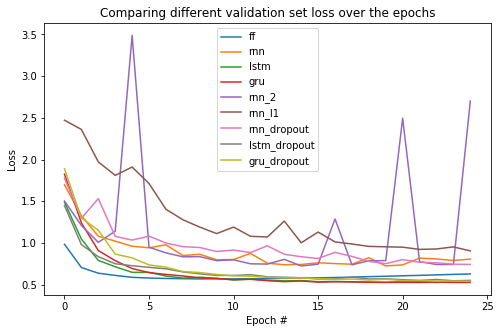

In [25]:
# plot all the models and compare them with val_loss
plt.figure(figsize=(8,5))
plt.plot(result_ff.history["val_loss"][:25], label="ff")
plt.plot(result_rnn.history["val_loss"][:25], label="rnn")
plt.plot(result_lstm.history["val_loss"], label="lstm")
plt.plot(result_gru.history["val_loss"], label="gru")
plt.plot(result_rnn_2.history["val_loss"], label="rnn_2")
plt.plot(result_rnn_l1.history["val_loss"], label="rnn_l1")
plt.plot(result_rnn_drop.history["val_loss"], label="rnn_dropout")
plt.plot(result_lstm_drop.history["val_loss"], label="lstm_dropout")
plt.plot(result_gru_drop.history["val_loss"], label="gru_dropout")
plt.title("Comparing different validation set loss over the epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

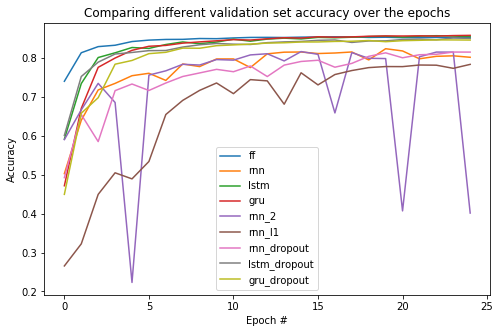

In [22]:
# plat all the models and compare them with val_acc
plt.figure(figsize=(8,5))
plt.plot(result_ff.history["val_acc"][:25], label="ff")
plt.plot(result_rnn.history["val_acc"][:25], label="rnn")
plt.plot(result_lstm.history["val_acc"], label="lstm")
plt.plot(result_gru.history["val_acc"], label="gru")
plt.plot(result_rnn_2.history["val_acc"], label="rnn_2")
plt.plot(result_rnn_l1.history["val_acc"], label="rnn_l1")
plt.plot(result_rnn_drop.history["val_acc"], label="rnn_dropout")
plt.plot(result_lstm_drop.history["val_acc"], label="lstm_dropout")
plt.plot(result_gru_drop.history["val_acc"], label="gru_dropout")
plt.title("Comparing different validation set accuracy over the epochs")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 9. Select the best performing model based on the validation set and evaluate its performance using the test set

In [23]:
model_gru.evaluate(x_test, y_test)

38693/38693 [==============================] - 13s 341us/step


[0.5354020799637099, 0.8573385366877627]

From the plot above, the best model is RNN with GRU layer. The tests accuracy for the best model is 85.73%, which is worse than the hand-coding model.